In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

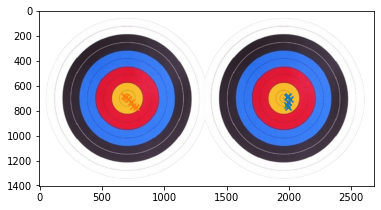

In [2]:

folder_path = 'checkpoint/'
image_file = 'targets.png'

image = mpimg.imread(image_file)
plt.imshow(image)
player_A = {'x':[1985,1990,2010,1985,1990,1992],
            'y':[755,680,710,690,730,770]
}

player_B = {'x':[750,680,710,690,730,770],
            'y':[764,683,710,690,730,770]
}

# Throwing darts
plt.scatter(player_A['x'],player_A['y'], marker='x')
plt.scatter(player_B['x'],player_B['y'], marker='x')
plt.show()

In [3]:
df = pd.DataFrame({'x':[750,680,710,690,730,770,1985,1990,2010,1985,1990,1992],
            'y':[764,683,710,690,730,770,755,680,710,690,730,770]
})

df.head(2)

,x,y
0,750,764
1,680,683


Jag gissar mig fram här men det känns rätt. Jag tar all data och ber kmeans göra två kluster av datan. Dessa 2 kluster bör representera vardera spelares träffar. Sedan ger jag datan en label baserat på kmeans.labels_. Till slut tittar jag på respektive spelares inertias för att se vem som vann.

In [4]:
X = df[['x','y']]
kmeans = KMeans(n_clusters=2, random_state=42,n_init='auto').fit(X)

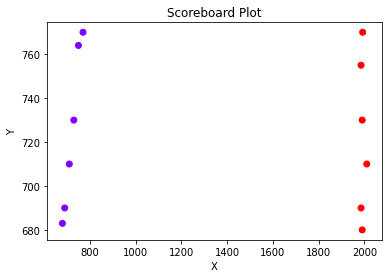

In [5]:
plt.scatter(X['x'], X['y'], c=kmeans.labels_, cmap='rainbow')

plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Scoreboard Plot')
plt.show()

In [6]:
df['player'] = kmeans.labels_
df.head(7)

,x,y,player
0,750,764,0
1,680,683,0
2,710,710,0
3,690,690,0
4,730,730,0
5,770,770,0
6,1985,755,1


In [7]:
player0 = df[df['player'] == 0]
player1 = df[df['player'] == 1]

In [ ]:
X0 = player0[['x','y']]
kmeans0 = KMeans(n_clusters=1, random_state=42).fit(X0)
X1 = player1[['x','y']]
kmeans1 = KMeans(n_clusters=1, random_state=42).fit(X1)

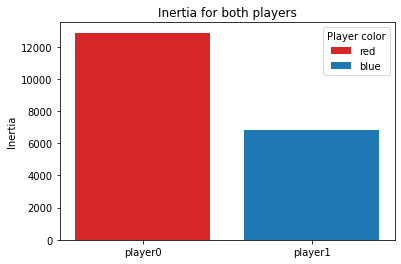

In [14]:
fig, ax = plt.subplots()

players = ['player0', 'player1']
counts = [kmeans0.inertia_, kmeans1.inertia_]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(players, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Inertia')
ax.set_title('Inertia for both players')
ax.legend(title='Player color')

plt.show()


In [17]:
f"Player1s intertia ({kmeans1.inertia_}) är lägre än Player0s inertia ({kmeans0.inertia_})"


'Player1s intertia (6817.5) är lägre än Player0s inertia (12866.833333333334)'

<h1>PLAYER 1 WINS!</h1>